In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('sales.csv',index_col=0)
print(data.shape)
data.head()

(640840, 9)


,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
425390,366,4,2013-04-18,517,1,0,0,0,4422
291687,394,6,2015-04-11,694,1,0,0,0,8297
411278,807,4,2013-08-29,970,1,1,0,0,9729
664714,802,2,2013-05-28,473,1,1,0,0,6513
540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [19]:
data.describe()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [20]:
data['state_holiday'].value_counts()

state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

# establishing baseline model

In [21]:
X = data.drop(columns='sales')
y = data['sales']

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
import xgboost as xgb

# xgb_reg = xgb.XGBRegressor()
# xgb_reg.fit(X_train,y_train)
# xgb_reg.score(X_test,y_test)

In [24]:
data.dtypes

store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [25]:
X = data.drop(columns=['sales','date','state_holiday'])
y = data['sales']

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg.score(X_test,y_test)

0.9264008402824402

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = xgb_reg.predict(X_test)

print("mse: ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("mae: ", mean_absolute_error(y_test,y_pred))

mse:  1043.4087765588326
mae:  704.3681030273438


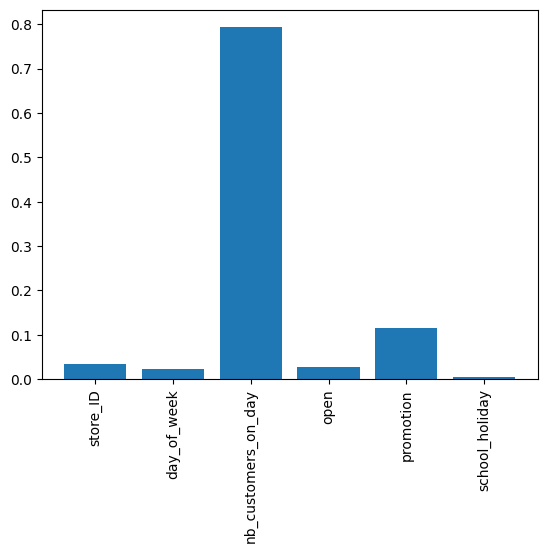

In [28]:
fig, ax = plt.subplots()
ax.bar(range(len(xgb_reg.feature_importances_)), xgb_reg.feature_importances_)
plt.xticks(range(6),X.columns,rotation=90)
plt.show()

# Data engineering basics

In [29]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalizer = normalizer.fit(X_train)

In [30]:
X_train_normalized = normalizer.transform(X_train)
X_test_normalized = normalizer.transform(X_test)
X_test_normalized

array([[0.21095153, 0.33333333, 0.1980579 , 1.        , 1.        ,
        0.        ],
       [0.76750449, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.36445242, 0.16666667, 0.06339318, 1.        , 1.        ,
        0.        ],
       ...,
       [0.04398564, 0.16666667, 0.06449249, 1.        , 1.        ,
        0.        ],
       [0.85278276, 0.        , 0.13704654, 1.        , 0.        ,
        0.        ],
       [0.9048474 , 0.        , 0.10425064, 1.        , 1.        ,
        0.        ]])

In [31]:
pd.DataFrame(X_train_normalized, columns=X_train.columns)

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday
0,0.963196,0.000000,0.134115,1.0,1.0,1.0
1,0.848294,0.000000,0.093258,1.0,0.0,1.0
2,0.371634,1.000000,0.000000,0.0,0.0,0.0
3,0.991921,0.166667,0.110297,1.0,1.0,0.0
4,0.795332,0.500000,0.098571,1.0,0.0,0.0
...,...,...,...,...,...,...
480625,0.347397,0.500000,0.190546,1.0,0.0,1.0
480626,0.684022,0.000000,0.130817,1.0,1.0,0.0
480627,0.981149,0.500000,0.000000,0.0,0.0,1.0
480628,0.240575,0.666667,0.000000,0.0,1.0,1.0


In [32]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_normalized,y_train)
xgb_reg.score(X_test,y_test)

-13.877029418945312

In [33]:
xgb_reg.score(X_test_normalized,y_test)

0.9264008402824402

# Data engineering - semantics

## I have one suspicion: closed stores do not generate revenue

In [34]:
X_train[X_train['open']==0]

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday
540923,415,7,0,0,0,0
439309,489,7,0,0,0,0
305720,1006,7,0,0,0,0
195583,481,7,0,0,0,0
609833,176,7,0,0,0,0
...,...,...,...,...,...,...
512254,693,7,0,0,0,1
88184,717,7,0,0,0,0
642228,884,7,0,0,0,0
395791,1094,4,0,0,0,1


In [35]:
y_train[X_train['open']==0].sum()

np.int64(0)

In [36]:
def separate_closed_open_days(dataframe):
  return np.array(dataframe[dataframe['open']==0].index), np.array(dataframe[dataframe['open']!=0].index)

In [37]:
closed_days, open_days = separate_closed_open_days(X_train)

In [38]:
X_train_closed = X_train.loc[closed_days]
y_train_closed = y_train.loc[closed_days]

X_train_open = X_train.loc[open_days]
y_train_open = y_train.loc[open_days]

In [39]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_open, y_train_open)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
closed_days_t, open_days_t = separate_closed_open_days(X_test)


X_test_closed = X_test.loc[closed_days_t]
y_test_closed = y_test.loc[closed_days_t]
X_test_open = X_test.loc[open_days_t]
y_test_open = y_test.loc[open_days_t]

In [41]:
xgb_reg.score(X_test_open,y_test_open)

0.8666707873344421

In [42]:
X_test_open['prediction'] = xgb_reg.predict(X_test_open)
X_test_open['real_sales'] = y_test_open

X_test_closed['prediction'] = 0
X_test_closed['real_sales'] = y_test_closed

X_test_predictions_total = pd.concat([X_test_open,X_test_closed],axis=0)
X_test_predictions_total

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,prediction,real_sales
173548,236,3,1081,1,1,0,10322.087891,10108
158198,407,2,346,1,1,0,4098.440430,4232
188226,942,3,411,1,1,0,4997.510254,5189
711780,917,2,673,1,0,0,5605.391602,5318
156465,425,2,484,1,0,1,3985.568604,3266
...,...,...,...,...,...,...,...,...
550335,546,7,0,0,0,0,0.000000,0
552756,1096,7,0,0,0,0,0.000000,0
305731,1010,7,0,0,0,0,0.000000,0
35789,257,7,0,0,0,0,0.000000,0


In [43]:
preds = X_test_predictions_total['prediction']
real_values = X_test_predictions_total['real_sales']

In [44]:
from sklearn.metrics import r2_score

print("r2: ", r2_score(real_values,preds))
print("mse: ", np.sqrt(mean_squared_error(real_values,preds)))
print("mae: ", mean_absolute_error(real_values,preds))

r2:  0.9282204245621706
mse:  1030.4301215718008
mae:  681.1869192172106


In [45]:
mse:  1043.4086712513083
mae:  704.368110182174

## I have another suspicion: on hildays, stores are closed

In [46]:
data[(data['school_holiday']!=0)|(data['state_holiday']!="0")]

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
96265,27,3,2014-07-16,1106,1,1,0,1,11162
528712,447,1,2013-07-01,773,1,1,0,1,7205
617816,5,3,2015-07-29,658,1,1,0,1,5899
430362,800,5,2013-10-18,460,1,0,0,1,4120
643894,632,3,2015-03-04,924,1,1,0,1,7970
...,...,...,...,...,...,...,...,...,...
61713,840,5,2013-01-04,1038,1,0,0,1,7117
151078,48,5,2015-07-31,390,1,1,0,1,3874
71557,33,1,2013-04-01,0,0,0,b,1,0
49811,870,3,2014-07-23,0,0,0,0,1,0


In [47]:
data[(data['state_holiday']!="0")]

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
654516,836,5,2015-05-01,0,0,1,a,0,0
350557,552,1,2013-05-20,0,0,0,a,0,0
27878,803,5,2014-10-03,0,0,1,a,0,0
610321,570,4,2014-05-01,0,0,1,a,0,0
11690,676,3,2014-01-01,946,1,0,a,1,5755
...,...,...,...,...,...,...,...,...,...
700713,645,5,2013-11-01,0,0,0,a,0,0
670948,328,4,2013-05-09,0,0,0,a,0,0
538112,100,2,2015-01-06,0,0,1,a,0,0
138084,842,4,2014-05-29,0,0,0,a,0,0


In [48]:
data[(data['school_holiday']!=0)&(data['state_holiday']!='0')&(data['open']==1)]['date'].value_counts()

date
2014-04-21    24
2013-04-01    23
2015-04-06    18
2014-12-26    14
2015-01-01    14
2013-08-15    14
2013-12-26    13
2014-12-25    11
2013-01-01    11
2013-03-29    11
2015-04-03    10
2014-04-18    10
2013-12-25    10
2014-01-01     9
2013-10-03     4
2014-06-19     3
2013-11-01     2
2014-10-31     2
2015-05-14     1
2013-05-30     1
2014-05-01     1
Name: count, dtype: int64

In [49]:
data[(data['school_holiday']!=0)&(data['state_holiday']!='0')&(data['open']==0)]['date'].value_counts()

date
2013-12-25    717
2013-01-01    708
2014-01-01    703
2013-12-26    684
2015-01-01    680
2013-03-29    679
2013-04-01    638
2014-04-21    632
2015-04-03    627
2014-04-18    618
2015-04-06    610
2014-12-26    596
2014-12-25    579
2013-11-01    175
2013-05-30    161
2014-06-19    155
2015-06-04    153
2014-05-01    116
2013-08-15    103
2014-10-31     82
2013-10-03     78
2013-10-31     69
2013-05-20     52
2013-05-09     18
2015-05-14     18
Name: count, dtype: int64

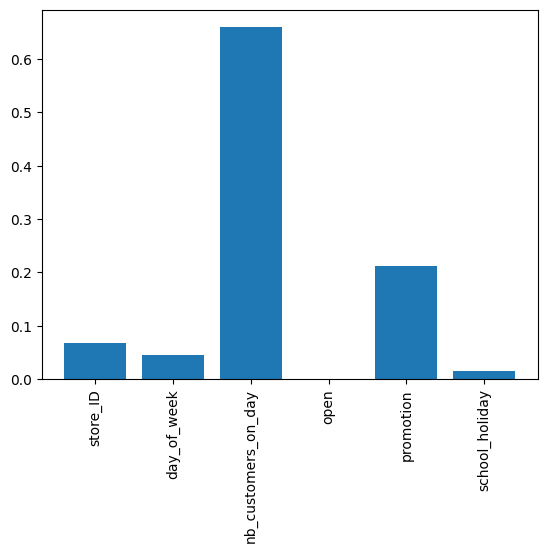

In [50]:
fig, ax = plt.subplots()
ax.bar(range(len(xgb_reg.feature_importances_)), xgb_reg.feature_importances_)
plt.xticks(range(6),X.columns,rotation=90)
plt.show()

## Data engineering : target encoding

In [51]:
X = data.drop(columns=['sales','date','state_holiday'])#'school_holiday'
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

closed_days, open_days = separate_closed_open_days(X_train)

X_train_closed = X_train.loc[closed_days]
y_train_closed = y_train.loc[closed_days]
X_train_open = X_train.loc[open_days]
y_train_open = y_train.loc[open_days]

In [52]:
X_train_open['store_ID']

430555    1074
664964     946
261351    1106
518378     887
119932     713
          ... 
207282     408
535410     905
362570     388
334768     763
684465     141
Name: store_ID, Length: 399023, dtype: int64

In [53]:
X_train_open['store_ID'].value_counts()

store_ID
259    477
494    463
530    459
353    453
682    453
      ... 
165    268
534    264
13     263
81     254
859    253
Name: count, Length: 1115, dtype: int64

In [54]:
#...generates 1115 columns... not great. How can we convert this to a numerical signal that makes sense?
# each store can be identified by the "usual" money it makes!
days_open_data = X_train_open.copy()
days_open_data['sales'] = y_train_open
days_open_data

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
430555,1074,1,732,1,1,1,8397
664964,946,1,509,1,0,1,3820
261351,1106,2,602,1,1,0,5065
518378,887,4,538,1,0,0,5707
119932,713,5,1241,1,0,0,10655
...,...,...,...,...,...,...,...
207282,408,6,507,1,0,0,4854
535410,905,3,1261,1,0,0,7676
362570,388,4,1040,1,0,1,8737
334768,763,1,714,1,1,0,8696


In [55]:
days_open_data.groupby('store_ID').agg('mean')['sales']

store_ID
1        4762.332461
2        4973.004963
3        6836.602067
4        9724.511364
5        4648.926509
            ...     
1111     5322.311653
1112    10156.660969
1113     6674.025907
1114    20552.759887
1115     6218.289256
Name: sales, Length: 1115, dtype: float64

In [56]:
pd.Series([1,2,3,2,5])

0    1
1    2
2    3
3    2
4    5
dtype: int64

In [57]:
pd.Series([1,2,3,2,5]).replace({1:'one',2:'two'})

0    one
1    two
2      3
3    two
4      5
dtype: object

In [58]:
store_avg_sales_dict = days_open_data.groupby('store_ID').agg('mean')['sales'].to_dict()
store_avg_sales_dict

{1: 4762.332460732984,
 2: 4973.004962779156,
 3: 6836.602067183462,
 4: 9724.511363636364,
 5: 4648.926509186352,
 6: 5382.638888888889,
 7: 8770.323782234957,
 8: 5509.936339522546,
 9: 6517.721448467966,
 10: 5580.160714285715,
 11: 7957.292875989446,
 12: 7645.621693121693,
 13: 5005.984790874525,
 14: 5616.408839779006,
 15: 6812.493150684932,
 16: 7703.599431818182,
 17: 6333.090185676392,
 18: 6557.822102425876,
 19: 6479.1589041095895,
 20: 7618.411764705882,
 21: 5466.002732240438,
 22: 4511.838187702266,
 23: 5597.393700787402,
 24: 9310.2807486631,
 25: 11239.92561983471,
 26: 6682.7223796033995,
 27: 9490.138211382115,
 28: 5430.408376963351,
 29: 7405.442666666667,
 30: 5292.563829787234,
 31: 5874.979848866498,
 32: 3982.1068965517243,
 33: 8460.963157894737,
 34: 8073.210526315789,
 35: 9784.913580246914,
 36: 9325.677852348994,
 37: 7246.1869918699185,
 38: 6010.550143266476,
 39: 4711.620967741936,
 40: 4875.375366568915,
 41: 5276.59405940594,
 42: 10427.420485175202,

In [59]:
X_train_open['store_avg_sales'] = X_train_open['store_ID'].replace(store_avg_sales_dict)
X_train_open.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,store_avg_sales
430555,1074,1,732,1,1,1,5109.185083
664964,946,1,509,1,0,1,4207.745763
261351,1106,2,602,1,1,0,4794.215259
518378,887,4,538,1,0,0,6830.197222
119932,713,5,1241,1,0,0,10737.399457


In [60]:
days_open_data['sales/person'] = days_open_data['sales']/days_open_data['nb_customers_on_day']
days_open_data.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,sales/person
430555,1074,1,732,1,1,1,8397,11.471311
664964,946,1,509,1,0,1,3820,7.504912
261351,1106,2,602,1,1,0,5065,8.413621
518378,887,4,538,1,0,0,5707,10.607807
119932,713,5,1241,1,0,0,10655,8.585818


In [61]:
store_avg_salesperperson_dict = days_open_data.groupby('store_ID').agg('mean')['sales/person'].to_dict()
store_avg_salesperperson_dict

{1: 8.394317408923628,
 2: 8.414373233259212,
 3: 9.083118519508146,
 4: 7.29353944646438,
 5: 8.557645309829919,
 6: 8.601643705724019,
 7: 9.225158624850307,
 8: 8.263552575267239,
 9: 11.21732848874286,
 10: 9.338815449382244,
 11: 7.020166233973808,
 12: 8.380679185094865,
 13: 12.924363165533526,
 14: 8.70796860739318,
 15: 10.034083259909782,
 16: 9.014127572521422,
 17: 7.869980762468797,
 18: 9.130844621491272,
 19: 10.299902542110916,
 20: 9.201392854788256,
 21: 10.42711662501765,
 22: 8.897504524145168,
 23: 11.319166084989261,
 24: 11.05963650385214,
 25: 7.086856938826331,
 26: 11.802299555599383,
 27: 8.71984945496338,
 28: 8.935265986820516,
 29: 11.112013550220542,
 30: 6.7302199818061785,
 31: 9.91471454066684,
 32: 8.373344957836443,
 33: 10.0071984288187,
 34: 8.037798339337394,
 35: 13.08407025670171,
 36: 8.571513820676437,
 37: 9.1098879587244,
 38: 11.087717147225518,
 39: 7.469942502339348,
 40: 7.337197284216198,
 41: 13.315152294001306,
 42: 9.2628714814004,
 

In [62]:
X_train_open['store_avg_sales/person'] = X_train_open['store_ID'].replace(store_avg_salesperperson_dict)
X_train_open.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,store_avg_sales,store_avg_sales/person
430555,1074,1,732,1,1,1,5109.185083,9.173610
664964,946,1,509,1,0,1,4207.745763,7.802446
261351,1106,2,602,1,1,0,4794.215259,8.674438
518378,887,4,538,1,0,0,6830.197222,11.768215
119932,713,5,1241,1,0,0,10737.399457,8.095182


In [63]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_open, y_train_open)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
closed_days_t, open_days_t = separate_closed_open_days(X_test)


X_test_closed = X_test.loc[closed_days_t]
y_test_closed = y_test.loc[closed_days_t]
X_test_open = X_test.loc[open_days_t]
y_test_open = y_test.loc[open_days_t]

In [65]:
#xgb_reg.score(X_test_open,y_test_open)

In [66]:
X_test_open['store_avg_sales'] = X_test_open['store_ID'].replace(store_avg_sales_dict)
X_test_open['store_avg_sales/person']= X_test_open['store_ID'].replace(store_avg_salesperperson_dict)
X_test_open.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,store_avg_sales,store_avg_sales/person
173548,236,3,1081,1,1,0,7141.288889,8.184373
158198,407,2,346,1,1,0,3954.652482,12.293198
188226,942,3,411,1,1,0,6061.394286,12.767923
711780,917,2,673,1,0,0,6660.668508,8.959098
156465,425,2,484,1,0,1,3262.038043,7.386708


In [67]:
xgb_reg.score(X_test_open,y_test_open)

0.9715080261230469

In [68]:
preds = xgb_reg.predict(X_test_open)
print("r2: ",r2_score(preds,y_test_open))
print("mse: ",np.sqrt(mean_squared_error(preds,y_test_open)))
print("mae: ",mean_absolute_error(preds,y_test_open))

r2:  0.9708069562911987
mse:  522.8145584239214
mae:  356.5712890625


In [69]:
X_test_closed['prediction']=0
display(np.array(X_test_closed['prediction']))
display(np.array(y_test_closed))

array([0, 0, 0, ..., 0, 0, 0])

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
allpreds = np.concatenate((preds, np.array(X_test_closed['prediction'])))
allys = np.concatenate((y_test_open, y_test_closed))
display(allpreds)
display(allys)

array([9699.27734375, 4599.67041016, 5621.77685547, ...,    0.        ,
          0.        ,    0.        ])

array([10108,  4232,  5189, ...,     0,     0,     0])

In [71]:
print("r2: ",r2_score(allys,allpreds))
print("mse: ",np.sqrt(mean_squared_error(allys,allpreds)))
print("mae: ",mean_absolute_error(allys,allpreds))

r2:  0.984660956723293
mse:  476.34020503589574
mae:  295.9957430715783


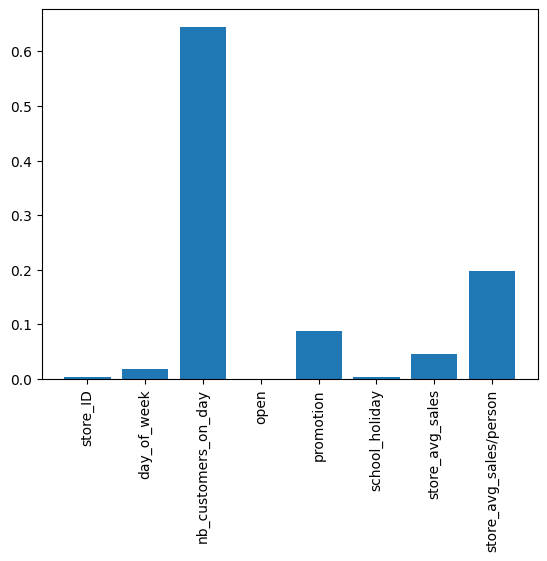

In [72]:
fig, ax = plt.subplots()
ax.bar(range(len(xgb_reg.feature_importances_)), xgb_reg.feature_importances_)
plt.xticks(range(8),X_train_open.columns,rotation=90)
plt.show()

In [73]:
X_test_open

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,store_avg_sales,store_avg_sales/person
173548,236,3,1081,1,1,0,7141.288889,8.184373
158198,407,2,346,1,1,0,3954.652482,12.293198
188226,942,3,411,1,1,0,6061.394286,12.767923
711780,917,2,673,1,0,0,6660.668508,8.959098
156465,425,2,484,1,0,1,3262.038043,7.386708
...,...,...,...,...,...,...,...,...
281423,579,4,866,1,1,0,8442.982558,9.055784
436705,522,4,679,1,1,0,8271.696246,12.994382
232293,50,2,352,1,1,0,4254.295630,11.669431
686113,951,1,748,1,0,0,7759.856742,10.726377


In [74]:
days_open_data

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,sales/person
430555,1074,1,732,1,1,1,8397,11.471311
664964,946,1,509,1,0,1,3820,7.504912
261351,1106,2,602,1,1,0,5065,8.413621
518378,887,4,538,1,0,0,5707,10.607807
119932,713,5,1241,1,0,0,10655,8.585818
...,...,...,...,...,...,...,...,...
207282,408,6,507,1,0,0,4854,9.573964
535410,905,3,1261,1,0,0,7676,6.087232
362570,388,4,1040,1,0,1,8737,8.400962
334768,763,1,714,1,1,0,8696,12.179272


In [75]:
dow_avg_salespperson_dict = days_open_data.groupby('day_of_week').agg('mean')['sales/person'].to_dict()
dow_avg_salespperson_dict

{1: 9.902439737166445,
 2: 9.594413925724984,
 3: 9.497570476983062,
 4: 9.358688439914056,
 5: 9.445863040477903,
 6: 9.25455229893511,
 7: 6.437972020837208}

In [76]:
X_train_open['dow_avg_sales'] = X_train_open['day_of_week'].replace(dow_avg_salespperson_dict)
X_test_open['dow_avg_sales'] = X_test_open['day_of_week'].replace(dow_avg_salespperson_dict)
X_train_open.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,store_avg_sales,store_avg_sales/person,dow_avg_sales
430555,1074,1,732,1,1,1,5109.185083,9.173610,9.902440
664964,946,1,509,1,0,1,4207.745763,7.802446,9.902440
261351,1106,2,602,1,1,0,4794.215259,8.674438,9.594414
518378,887,4,538,1,0,0,6830.197222,11.768215,9.358688
119932,713,5,1241,1,0,0,10737.399457,8.095182,9.445863


## exploiting date

In [77]:
from sklearn.model_selection import train_test_split

def separate_closed_open_days(dataframe):
  return np.array(dataframe[dataframe['open']==0].index), np.array(dataframe[dataframe['open']!=0].index)

X = data.drop(columns=['sales','state_holiday','school_holiday'])
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

closed_days, open_days = separate_closed_open_days(X_train)
X_train_closed = X_train.loc[closed_days]
y_train_closed = y_train.loc[closed_days]
X_train_open = X_train.loc[open_days]
y_train_open = y_train.loc[open_days]

closed_days_t, open_days_t = separate_closed_open_days(X_test)
X_test_closed = X_test.loc[closed_days_t]
y_test_closed = y_test.loc[closed_days_t]
X_test_open = X_test.loc[open_days_t]
y_test_open = y_test.loc[open_days_t]

In [78]:
X_train_open['dow_avg_sales/person'] = X_train_open['day_of_week'].replace(dow_avg_salespperson_dict)
X_train_open['store_avg_sales']=X_train_open['store_ID'].replace(store_avg_sales_dict)
X_train_open['store_avg_sales/person']=X_train_open['store_ID'].replace(store_avg_salesperperson_dict)


X_test_open['dow_avg_sales/person'] = X_test_open['day_of_week'].replace(dow_avg_salespperson_dict)
X_test_open['store_avg_sales']=X_test_open['store_ID'].replace(store_avg_sales_dict)
X_test_open['store_avg_sales/person']=X_test_open['store_ID'].replace(store_avg_salesperperson_dict)

In [79]:
X_train_open['date']

430555    2015-02-16
664964    2014-08-25
261351    2013-04-23
518378    2015-07-23
119932    2013-06-28
             ...    
207282    2015-05-09
535410    2013-02-13
362570    2014-01-02
334768    2015-03-16
684465    2015-02-11
Name: date, Length: 399023, dtype: object

In [80]:
X_train_open['date'] = pd.to_datetime(X_train_open['date'])
X_test_open['date'] = pd.to_datetime(X_test_open['date'])
X_train_open['date']

430555   2015-02-16
664964   2014-08-25
261351   2013-04-23
518378   2015-07-23
119932   2013-06-28
            ...    
207282   2015-05-09
535410   2013-02-13
362570   2014-01-02
334768   2015-03-16
684465   2015-02-11
Name: date, Length: 399023, dtype: datetime64[ns]

<Axes: xlabel='date'>

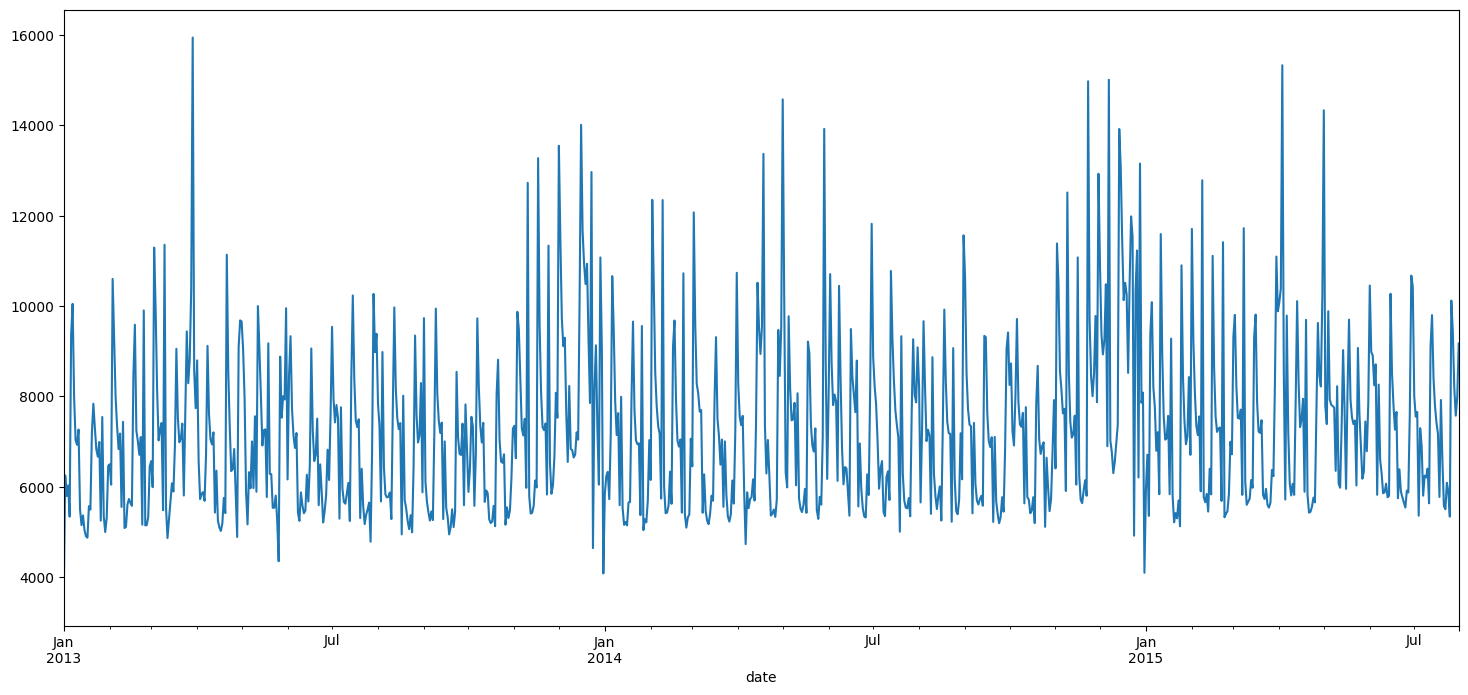

In [81]:
days_open_data = X_train_open.copy()
days_open_data['sales'] = y_train_open
timeseries = days_open_data.groupby('date').agg('mean')['sales']
timeseries.plot(figsize=(18,8))

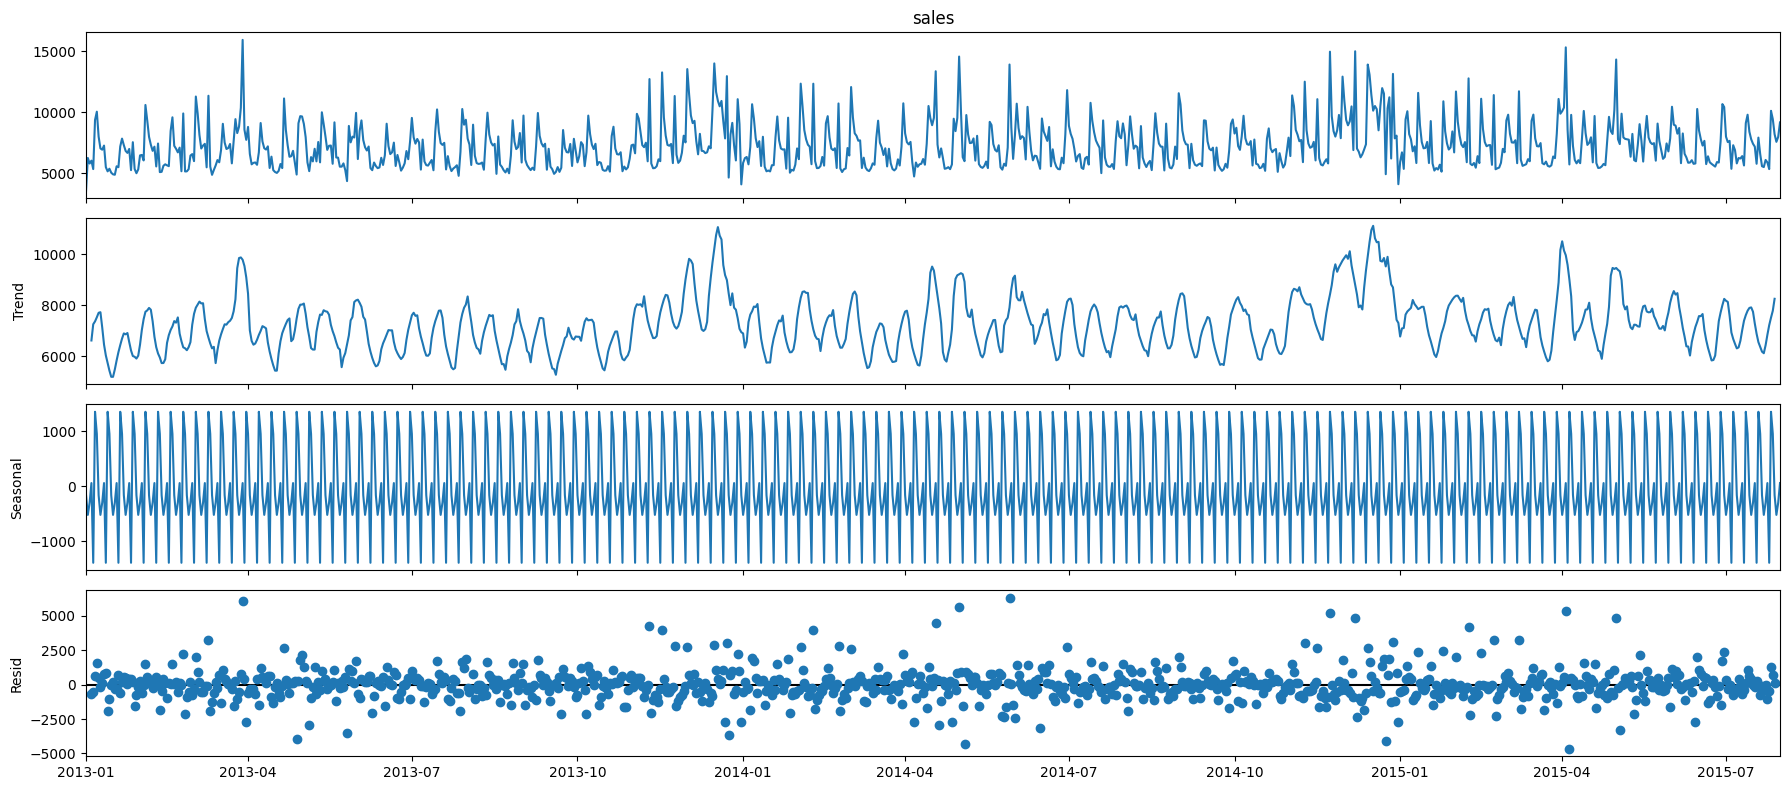

In [82]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(timeseries, model='additive')
fig = decomposition.plot()
plt.show()

In [83]:
#clear weekly seasonality (which we already covered)
#winter/christmas also clear
#not a lot of summer slump, interestingly
#peak in late march 2013, april-may 2014, early april 2015... can it be easter?

#Easter for the year 2013 is celebrated/ observed on Sunday, March 31th.
#Easter for the year 2014 is celebrated/ observed on Sunday, April 20th.
#Easter for the year 2015 is celebrated/ observed on Sunday, April 5th.

#seems like pre-christmas and pre-spring are peak periods. Let's make them evident

In [84]:
def zoom_in_date(start_datetime,end_datetime):

    time_slice = timeseries.loc[(timeseries.index >= start_datetime) & (timeseries.index <= end_datetime)]
    time_slice.plot(figsize=(18,2))
    plt.show()

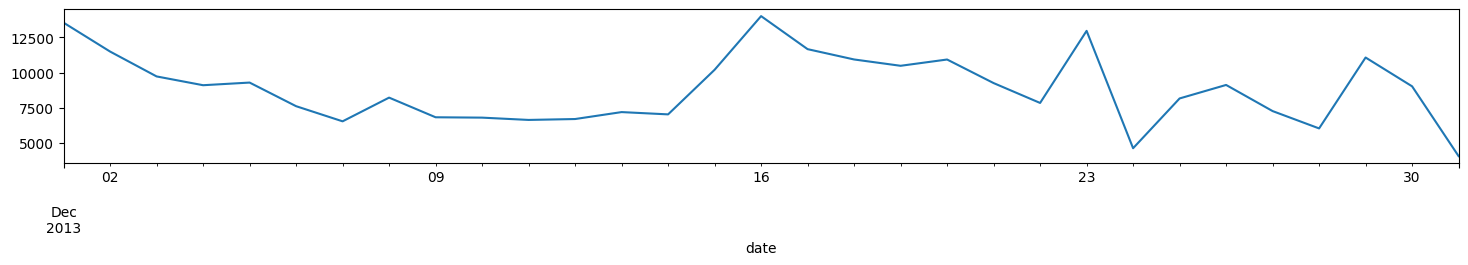

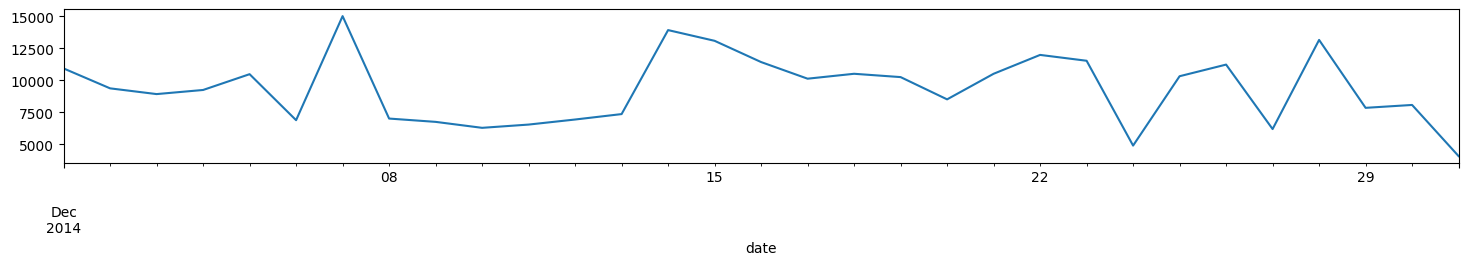

In [85]:
zoom_in_date('2013-12-01','2013-12-31')
zoom_in_date('2014-12-01','2014-12-31')

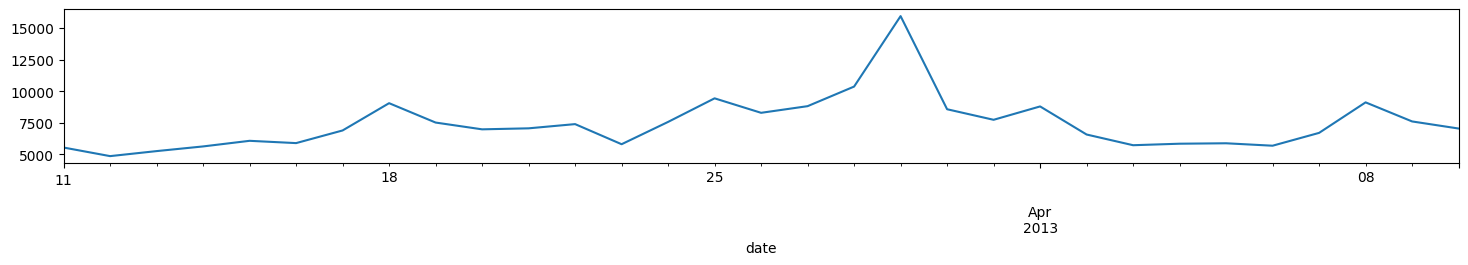

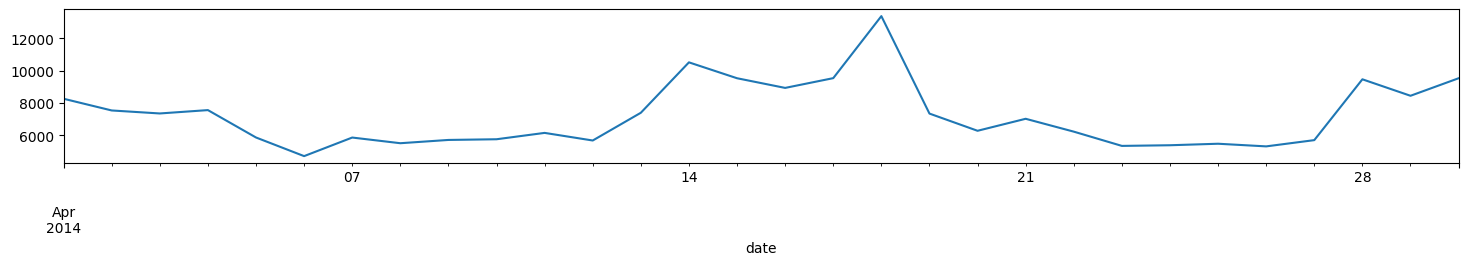

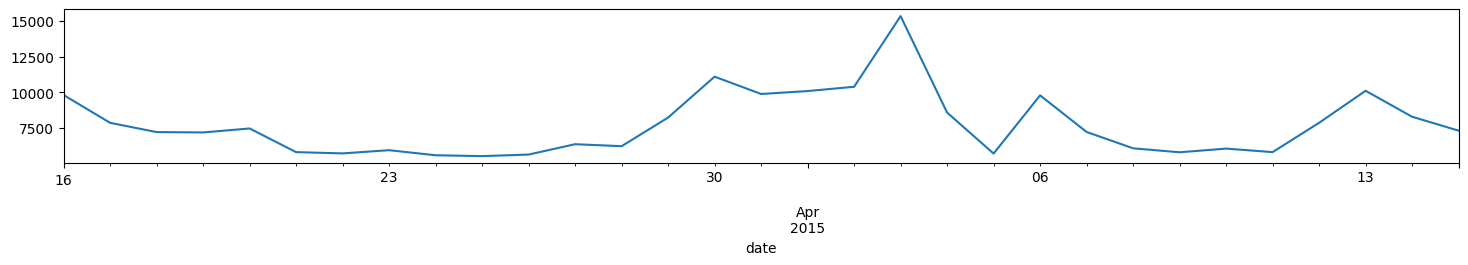

In [86]:
zoom_in_date('2013-03-11','2013-04-10') #31 march
zoom_in_date('2014-04-01','2014-04-30') #20 April
zoom_in_date('2015-03-16','2015-04-15') #5 April

In [87]:
import datetime
type(pd.Timestamp(datetime.date(2013, 12, 4)))

pandas._libs.tslibs.timestamps.Timestamp

In [88]:
def flag_near_christmas(row):
    if (row['date'] >= pd.Timestamp(datetime.date(2013, 12, 14))) & (row['date'] <= pd.Timestamp(datetime.date(2013, 12, 23))):
        return 1
    elif (row['date'] >= pd.Timestamp((datetime.date(2014, 12, 14)))) & (row['date'] <= pd.Timestamp((datetime.date(2014, 12, 23)))):
        return 1
    else:
        return 0

In [89]:
def flag_near_easter(row):
    if (row['date'] >= pd.Timestamp(datetime.date(2013, 3, 25))) & (row['date'] <= pd.Timestamp(datetime.date(2013, 3, 29))):
        return 1
    elif (row['date'] >= pd.Timestamp(datetime.date(2014, 4, 14))) & (row['date'] <= pd.Timestamp(datetime.date(2014, 4, 18))):
        return 1
    elif (row['date'] >= pd.Timestamp(datetime.date(2015, 3, 29))) & (row['date'] <= pd.Timestamp(datetime.date(2015, 4, 3))):
        return 1
    else:
        return 0

In [90]:
X_train_open['nearchristmas'] = X_train_open.apply(flag_near_christmas,axis=1)
X_train_open['neareaster'] = X_train_open.apply(flag_near_easter,axis=1)
X_test_open['nearchristmas'] = X_test_open.apply(flag_near_christmas,axis=1)
X_test_open['neareaster'] = X_test_open.apply(flag_near_easter,axis=1)
X_train_open.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,dow_avg_sales/person,store_avg_sales,store_avg_sales/person,nearchristmas,neareaster
430555,1074,1,2015-02-16,732,1,1,9.902440,5109.185083,9.173610,0,0
664964,946,1,2014-08-25,509,1,0,9.902440,4207.745763,7.802446,0,0
261351,1106,2,2013-04-23,602,1,1,9.594414,4794.215259,8.674438,0,0
518378,887,4,2015-07-23,538,1,0,9.358688,6830.197222,11.768215,0,0
119932,713,5,2013-06-28,1241,1,0,9.445863,10737.399457,8.095182,0,0


In [91]:
X_train_open.sample(10)

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,dow_avg_sales/person,store_avg_sales,store_avg_sales/person,nearchristmas,neareaster
681640,27,4,2015-07-23,890,1,0,9.358688,9490.138211,8.719849,0,0
4930,281,5,2013-03-01,572,1,0,9.445863,5843.612137,10.578983,0,0
205602,575,5,2013-05-03,615,1,1,9.445863,5466.697368,10.579411,0,0
396349,808,2,2014-04-22,592,1,0,9.594414,7312.608309,11.993574,0,0
667965,184,1,2013-02-18,829,1,1,9.902440,6611.642643,10.987191,0,0
697378,746,5,2013-06-14,456,1,0,9.445863,6027.621984,11.654117,0,0
67246,963,2,2014-06-17,1499,1,1,9.594414,10876.811475,10.462760,0,0
495065,179,6,2013-04-20,818,1,0,9.254552,7348.035230,7.549113,0,0
133625,395,6,2013-05-04,338,1,0,9.254552,4000.790503,7.645151,0,0
256110,92,6,2013-01-26,550,1,0,9.254552,6050.195767,10.815824,0,0


In [92]:
X_train_open[X_train_open['nearchristmas']==1].head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,dow_avg_sales/person,store_avg_sales,store_avg_sales/person,nearchristmas,neareaster
664475,259,3,2014-12-17,2711,1,1,9.497570,11585.614256,4.875668,1,0
190039,988,4,2014-12-18,867,1,1,9.358688,4633.465517,6.475848,1,0
407569,708,6,2013-12-14,481,1,0,9.254552,4533.176119,9.272958,1,0
204457,950,2,2014-12-16,752,1,1,9.594414,5772.029570,10.118197,1,0
105612,559,5,2013-12-20,993,1,1,9.445863,5836.983516,7.689192,1,0


In [93]:
def get_year(date):
    return date.year

def get_month(date):
    return date.month

In [94]:
X_train_open['date'].apply(get_month).head()

430555    2
664964    8
261351    4
518378    7
119932    6
Name: date, dtype: int64

In [95]:
X_train_open['year'] = X_train_open['date'].apply(get_year)
X_test_open['year'] = X_test_open['date'].apply(get_year)
X_train_open['month'] = X_train_open['date'].apply(get_month)
X_test_open['month'] = X_test_open['date'].apply(get_month)
X_train_open.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,dow_avg_sales/person,store_avg_sales,store_avg_sales/person,nearchristmas,neareaster,year,month
430555,1074,1,2015-02-16,732,1,1,9.902440,5109.185083,9.173610,0,0,2015,2
664964,946,1,2014-08-25,509,1,0,9.902440,4207.745763,7.802446,0,0,2014,8
261351,1106,2,2013-04-23,602,1,1,9.594414,4794.215259,8.674438,0,0,2013,4
518378,887,4,2015-07-23,538,1,0,9.358688,6830.197222,11.768215,0,0,2015,7
119932,713,5,2013-06-28,1241,1,0,9.445863,10737.399457,8.095182,0,0,2013,6


In [96]:
pd.get_dummies(X_train_open['year'],drop_first=True,dtype=int).head()

,2014,2015
430555,0,1
664964,1,0
261351,0,0
518378,0,1
119932,0,0


In [97]:
X_train_open = pd.concat((X_train_open,pd.get_dummies(X_train_open['year'],drop_first=True,dtype=int)),axis=1)
X_test_open = pd.concat((X_test_open,pd.get_dummies(X_test_open['year'],drop_first=True,dtype=int)),axis=1)
X_train_open.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,dow_avg_sales/person,store_avg_sales,store_avg_sales/person,nearchristmas,neareaster,year,month,2014,2015
430555,1074,1,2015-02-16,732,1,1,9.902440,5109.185083,9.173610,0,0,2015,2,0,1
664964,946,1,2014-08-25,509,1,0,9.902440,4207.745763,7.802446,0,0,2014,8,1,0
261351,1106,2,2013-04-23,602,1,1,9.594414,4794.215259,8.674438,0,0,2013,4,0,0
518378,887,4,2015-07-23,538,1,0,9.358688,6830.197222,11.768215,0,0,2015,7,0,1
119932,713,5,2013-06-28,1241,1,0,9.445863,10737.399457,8.095182,0,0,2013,6,0,0


In [98]:
# For target encoding we need the target in the training data
days_open_data = X_train_open.copy()
days_open_data['sales'] = y_train_open
days_open_data['sales/person'] = days_open_data['sales']/days_open_data['nb_customers_on_day']

In [99]:
month_avg_sales_dict = days_open_data.groupby('month').agg('mean')['sales/person'].to_dict()
month_avg_sales_dict

{1: 9.45081900444682,
 2: 9.397318431758164,
 3: 9.557127548716032,
 4: 9.469791120813912,
 5: 9.541418925355565,
 6: 9.601665098571551,
 7: 9.646359620700887,
 8: 9.231881652877096,
 9: 9.144204523579162,
 10: 9.159588020199541,
 11: 9.586477233645986,
 12: 10.05543698506015}

In [100]:
X_train_open['month_avg_sales'] = X_train_open['month'].replace(month_avg_sales_dict)
X_test_open['month_avg_sales'] = X_test_open['month'].replace(month_avg_sales_dict)
X_train_open.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,dow_avg_sales/person,store_avg_sales,store_avg_sales/person,nearchristmas,neareaster,year,month,2014,2015,month_avg_sales
430555,1074,1,2015-02-16,732,1,1,9.902440,5109.185083,9.173610,0,0,2015,2,0,1,9.397318
664964,946,1,2014-08-25,509,1,0,9.902440,4207.745763,7.802446,0,0,2014,8,1,0,9.231882
261351,1106,2,2013-04-23,602,1,1,9.594414,4794.215259,8.674438,0,0,2013,4,0,0,9.469791
518378,887,4,2015-07-23,538,1,0,9.358688,6830.197222,11.768215,0,0,2015,7,0,1,9.646360
119932,713,5,2013-06-28,1241,1,0,9.445863,10737.399457,8.095182,0,0,2013,6,0,0,9.601665


In [101]:
X_train_open_clean = X_train_open.drop(columns=['store_ID','day_of_week','date','open','year','month'])
X_test_open_clean = X_test_open.drop(columns=['store_ID','day_of_week','date','open','year','month'])

In [102]:
X_train_open_clean

,nb_customers_on_day,promotion,dow_avg_sales/person,store_avg_sales,store_avg_sales/person,nearchristmas,neareaster,2014,2015,month_avg_sales
430555,732,1,9.902440,5109.185083,9.173610,0,0,0,1,9.397318
664964,509,0,9.902440,4207.745763,7.802446,0,0,1,0,9.231882
261351,602,1,9.594414,4794.215259,8.674438,0,0,0,0,9.469791
518378,538,0,9.358688,6830.197222,11.768215,0,0,0,1,9.646360
119932,1241,0,9.445863,10737.399457,8.095182,0,0,0,0,9.601665
...,...,...,...,...,...,...,...,...,...,...
207282,507,0,9.254552,4712.256065,10.048496,0,0,0,1,9.541419
535410,1261,0,9.497570,8458.280840,6.640007,0,0,0,0,9.397318
362570,1040,0,9.358688,10185.320413,9.212546,0,0,1,0,9.450819
334768,714,1,9.902440,6114.023747,10.392910,0,0,0,1,9.557128


In [103]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_open_clean, y_train_open)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [104]:
preds = xgb_reg.predict(X_test_open_clean)

print("r2: ",r2_score(preds,y_test_open))
print("mse: ",np.sqrt(mean_squared_error(preds,y_test_open)))
print("mae: ",mean_absolute_error(preds,y_test_open))

r2:  0.9765160083770752
mse:  469.8238532950408
mae:  322.0083312988281


In [105]:
X_test_closed['prediction']=0
display(np.array(X_test_closed['prediction']))
display(np.array(y_test_closed))

array([0, 0, 0, ..., 0, 0, 0])

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
allpreds = np.concatenate((preds, np.array(X_test_closed['prediction'])))
allys = np.concatenate((y_test_open, y_test_closed))
display(allpreds)
display(allys)

array([10007.91308594,  4597.25244141,  6087.39257812, ...,
           0.        ,     0.        ,     0.        ])

array([10108,  4232,  5189, ...,     0,     0,     0])

In [107]:
print("r2: ",r2_score(allpreds,allys))
print("mse: ",np.sqrt(mean_squared_error(allpreds,allys)))
print("mae: ",mean_absolute_error(allpreds,allys))

r2:  0.9874753550260386
mse:  428.05998870134084
mae:  267.3045386983768


# pickle relevant objects

In [108]:
import pickle

In [109]:
pickle.dump(xgb_reg,open('pkl_model.p','wb'))

In [110]:
pickle.dump(month_avg_sales_dict, open('pkl_month_avg_sales_dict.p', 'wb'))
pickle.dump(dow_avg_salespperson_dict, open('pkl_dow_avg_salespperson_dict.p', 'wb'))
pickle.dump(store_avg_sales_dict, open('pkl_store_avg_sales_dict.p', 'wb'))
pickle.dump(store_avg_salesperperson_dict, open('pkl_store_avg_salespperson_dict.p', 'wb'))

### clean code 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import pickle
import datetime
import xgboost as xgb

In [2]:
def separate_closed_open_days(dataframe):
  return np.array(dataframe[dataframe['open']==0].index), np.array(dataframe[dataframe['open']!=0].index)

def flag_near_christmas(row):
    if (row['date'] >= pd.Timestamp(datetime.date(2013, 12, 14))) & (row['date'] <= pd.Timestamp(datetime.date(2013, 12, 23))):
        return 1
    elif (row['date'] >= pd.Timestamp((datetime.date(2014, 12, 14)))) & (row['date'] <= pd.Timestamp((datetime.date(2014, 12, 23)))):
        return 1
    else:
        return 0

def flag_near_easter(row):
    if (row['date'] >= pd.Timestamp(datetime.date(2013, 3, 25))) & (row['date'] <= pd.Timestamp(datetime.date(2013, 3, 29))):
        return 1
    elif (row['date'] >= pd.Timestamp(datetime.date(2014, 4, 14))) & (row['date'] <= pd.Timestamp(datetime.date(2014, 4, 18))):
        return 1
    elif (row['date'] >= pd.Timestamp(datetime.date(2015, 3, 29))) & (row['date'] <= pd.Timestamp(datetime.date(2015, 4, 3))):
        return 1
    else:
        return 0
    
def get_year(date):
    return date.year

def get_month(date):
    return date.month


In [3]:
month_avg_sales_dict = pickle.load(open('pkl_dow_avg_salespperson_dict.p','rb'))
dow_avg_salespperson_dict = pickle.load(open('pkl_dow_avg_salespperson_dict.p','rb'))
store_avg_sales_dict = pickle.load(open('pkl_store_avg_sales_dict.p','rb'))
store_avg_salesperperson_dict = pickle.load(open('pkl_store_avg_salespperson_dict.p','rb'))

In [4]:
data = pd.read_csv('sales.csv',index_col=0)
X = data.drop(columns=['sales','state_holiday'])#'school_holiday'
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

closed_days, open_days = separate_closed_open_days(X_train)

X_train_closed = X_train.loc[closed_days]
y_train_closed = y_train.loc[closed_days]
X_train_open = X_train.loc[open_days]
y_train_open = y_train.loc[open_days]

X_train_open['dow_avg_sales/person'] = X_train_open['day_of_week'].replace(dow_avg_salespperson_dict)
X_train_open['store_avg_sales']=X_train_open['store_ID'].replace(store_avg_sales_dict)
X_train_open['store_avg_sales/person']=X_train_open['store_ID'].replace(store_avg_salesperperson_dict)
X_train_open['date'] = pd.to_datetime(X_train_open['date'])

X_train_open['nearchristmas'] = X_train_open.apply(flag_near_christmas,axis=1)
X_train_open['neareaster'] = X_train_open.apply(flag_near_easter,axis=1)
X_train_open['year'] = X_train_open['date'].apply(get_year)
X_train_open['month'] = X_train_open['date'].apply(get_month)
X_train_open = pd.concat((X_train_open,pd.get_dummies(X_train_open['year'],drop_first=True,dtype=int)),axis=1)
X_train_open['month_avg_sales'] = X_train_open['month'].replace(month_avg_sales_dict)
X_train_open = X_train_open.rename(columns=str)
X_train_open_clean = X_train_open.drop(columns=['store_ID','day_of_week','date','open','year','month'])


In [ ]:
closed_days_t, open_days_t = separate_closed_open_days(X_test)
X_test_closed = X_test.loc[closed_days_t]
X_test_open = X_test.loc[open_days_t]

y_test_closed = y_test.loc[closed_days_t]
y_test_open = y_test.loc[open_days_t]

X_test_open['dow_avg_sales/person'] = X_test_open['day_of_week'].replace(dow_avg_salespperson_dict)
X_test_open['store_avg_sales']=X_test_open['store_ID'].replace(store_avg_sales_dict)
X_test_open['store_avg_sales/person']=X_test_open['store_ID'].replace(store_avg_salesperperson_dict)
X_test_open['date'] = pd.to_datetime(X_test_open['date'])

X_test_open['nearchristmas'] = X_test_open.apply(flag_near_christmas,axis=1)
X_test_open['neareaster'] = X_test_open.apply(flag_near_easter,axis=1)
X_test_open['year'] = X_test_open['date'].apply(get_year)
X_test_open['month'] = X_test_open['date'].apply(get_month)
X_test_open = pd.concat((X_test_open,pd.get_dummies(X_test_open['year'],drop_first=True,dtype=int)),axis=1)
X_test_open['month_avg_sales'] = X_test_open['month'].replace(month_avg_sales_dict)
X_test_open = X_test_open.rename(columns=str)
X_test_open_clean = X_test_open.drop(columns=['store_ID','day_of_week','date','open','year','month'])

In [9]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_open_clean, y_train_open)
pickle.dump(xgb_reg,open('pkl_model.p','wb'))

In [7]:
# X_test_open_clean['prediction'] = xgb_reg.predict(X_test_open_clean)
# X_test_closed['prediction']=0

# X_test_predictions_total = pd.concat([X_test_open_clean['prediction'],X_test_closed['prediction']],axis=0)

X_test_open['prediction']  = xgb_reg.predict(X_test_open_clean)
X_test_closed['prediction']=0


allpreds = np.concatenate((np.array(X_test_open['prediction'] ), np.array(X_test_closed['prediction'])))

allys = np.concatenate((y_test_open, y_test_closed))

print("r2: ",r2_score(allpreds,allys))
print("mse: ",np.sqrt(mean_squared_error(allpreds,allys)))
print("mae: ",mean_absolute_error(allpreds,allys))



r2:  0.9876958866518348
mse:  424.3400920740231
mae:  264.81853652648374
